In [76]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

##### #fetchinf & reading csv file:-

In [77]:

df= pd.read_csv(r'C:\Users\LENOVO\Downloads\Python_Diwali_Sales_Analysis\Diwali sales data.csv',encoding = 'Unicode_escape')

##### #cheking no.s of rows & columns:-

In [78]:
df.shape

(11251, 15)

##### #fetching top in list 5 data:-

In [79]:
df.head(5)

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN       NaN  
3  23912.0     NaN       NaN  
4  23877.0     NaN       NaN

##### #show details info about dataset like null values,unnecessary columns:-

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


##### #fetching total no's of null values OR pd.isnull(df) => to check indepth null values:-

In [81]:
pd.isnull(df).sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

##### #To drop unwanted columns:-

In [82]:
df.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [83]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

##### #To remove all null values from dataset:-

In [84]:
df.dropna(inplace=True)

In [85]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [86]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

##### #To rename column name OR df[['Age', 'Amount']].describe() :-

In [87]:
df.rename(columns= {'Shaddi':'Marital_Status'},inplace =True)


In [88]:
df[['Age', 'Amount']].describe().astype(int)

Age  Amount
count  11239   11239
mean      35    9453
std       12    5222
min       12     188
25%       27    5443
50%       33    8109
75%       43   12675
max       92   23952

In [89]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

##                                           EXPLORATORY DATA ANALYSIS->

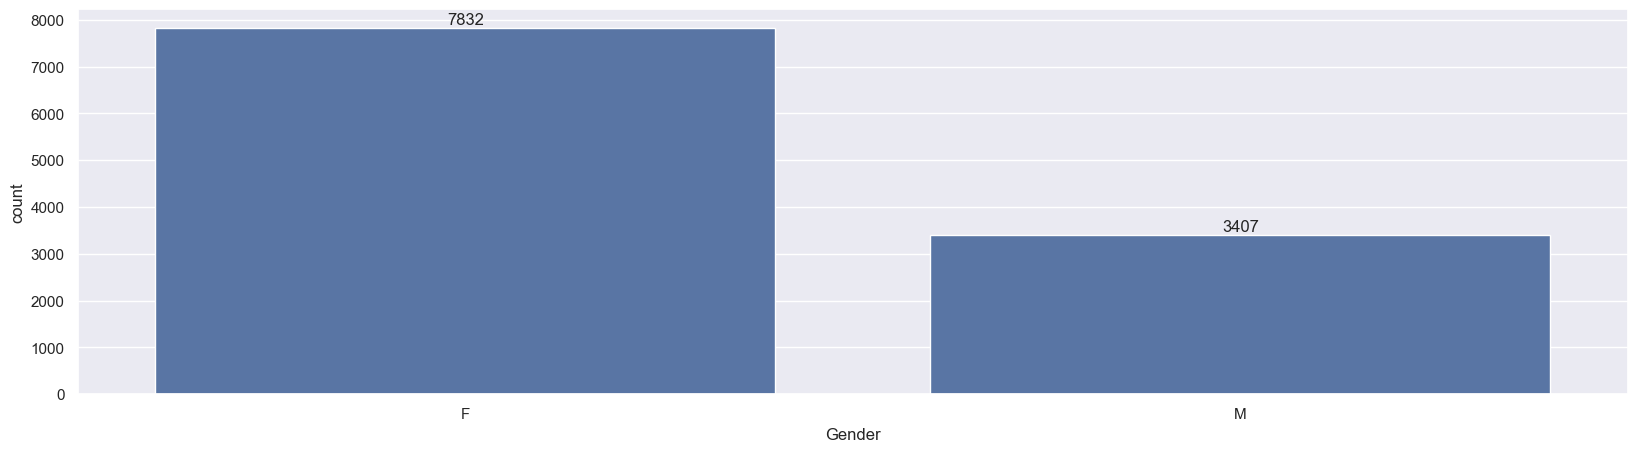

In [90]:
ax = sns.countplot(x ='Gender',data=df)
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

#### From above graph we can see Females are much more involved in placing Orders.

<Axes: xlabel='Gender', ylabel='Amount'>

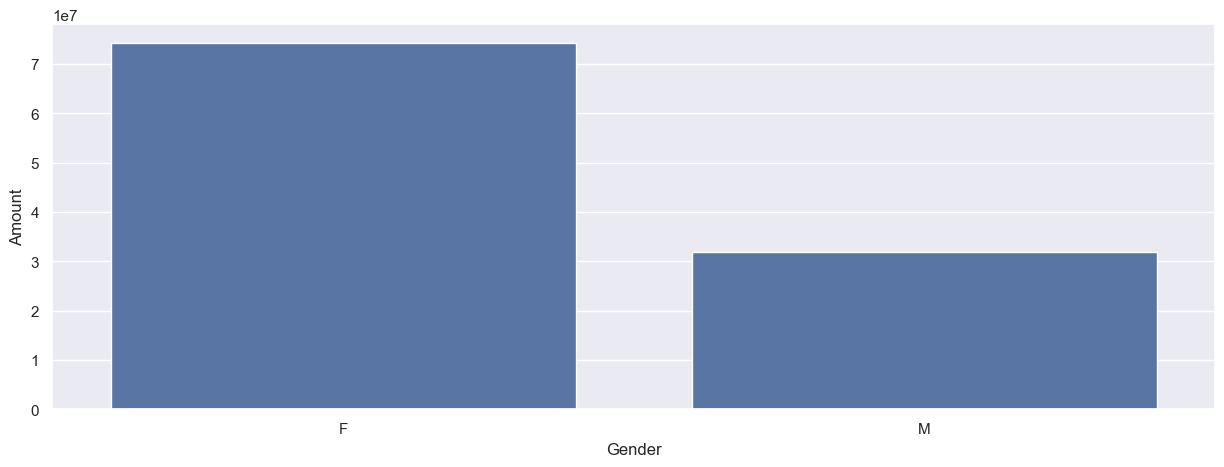

In [91]:
Sales_gend =df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by ='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data= Sales_gend)

#### From above graph we can see Females are spending more amount of money as compared to Males.

In [92]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

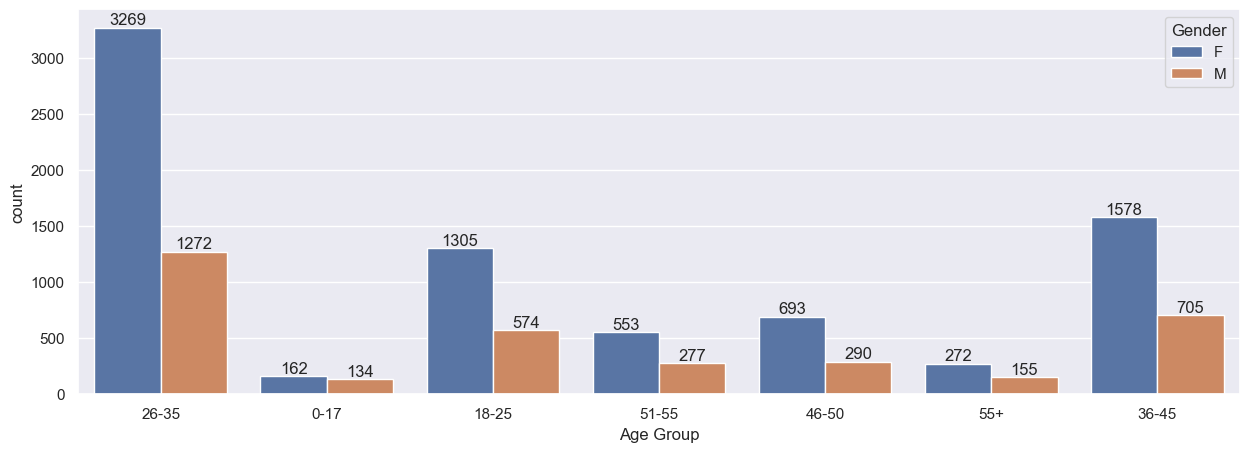

In [93]:
ax= sns.countplot(data =df,x = 'Age Group',hue ='Gender')
sns.set(rc={'figure.figsize':(12,4)})
for bars in ax.containers:
    ax.bar_label(bars)

#### From above graph we can see customers of age group 26-35 those are females are more involved in purchase

<Axes: xlabel='State', ylabel='Amount'>

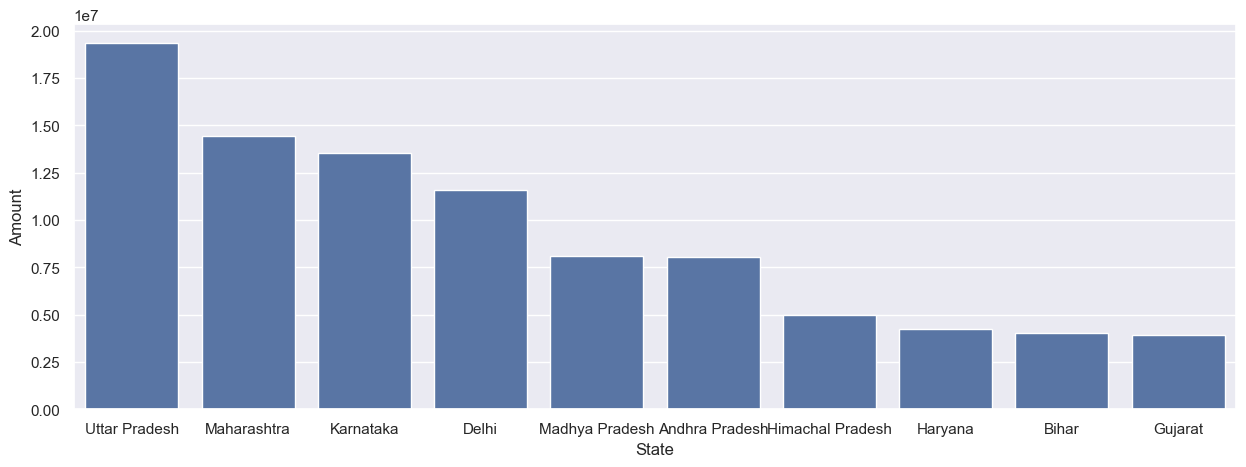

In [94]:
Sales_state= df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = Sales_state, x= 'State',y='Amount')

#### From above graph we can see Top 3 profitable countries are U.P,Maharashtra,Karnataka

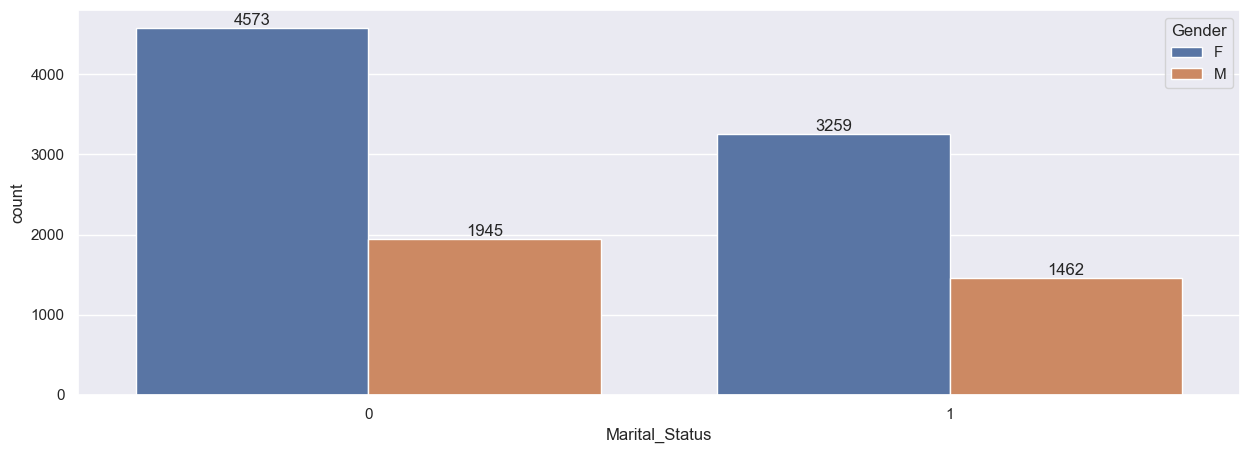

In [95]:
ax = sns.countplot(x ='Marital_Status',data=df,hue ='Gender')

sns.set(rc={'figure.figsize':(15,3)})
for bars in ax.containers:
    ax.bar_label(bars)

#### From above graph highest purchases are from married customers mostly by Womens.

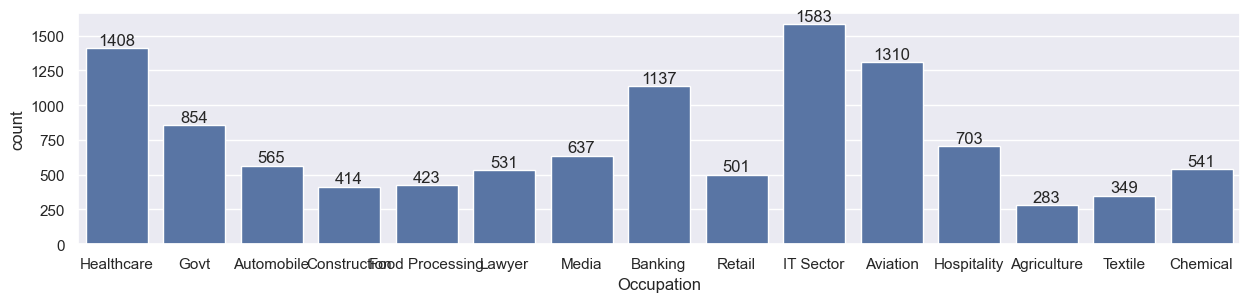

In [96]:
ax = sns.countplot(data=df,x='Occupation')
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

#### From above graph we can see most of purchases from which sector by Total amount spend.

<Axes: xlabel='Occupation', ylabel='Amount'>

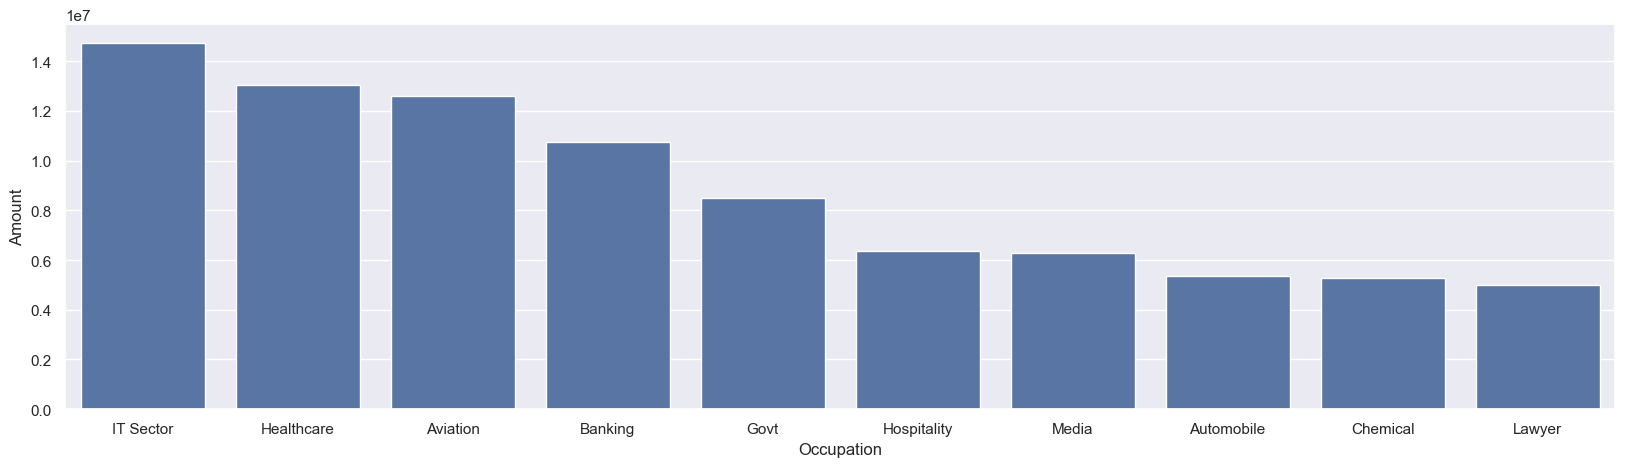

In [97]:
salesstate=df.groupby(['Occupation'],as_index =False)['Amount'].sum().sort_values(by ='Amount',ascending= False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data =salesstate,x='Occupation',y='Amount')


#### From above graph we can see most of active customers are from IT sector,Healthcare and Aviation domain

In [98]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

##### #No. of orders by Product Category:-

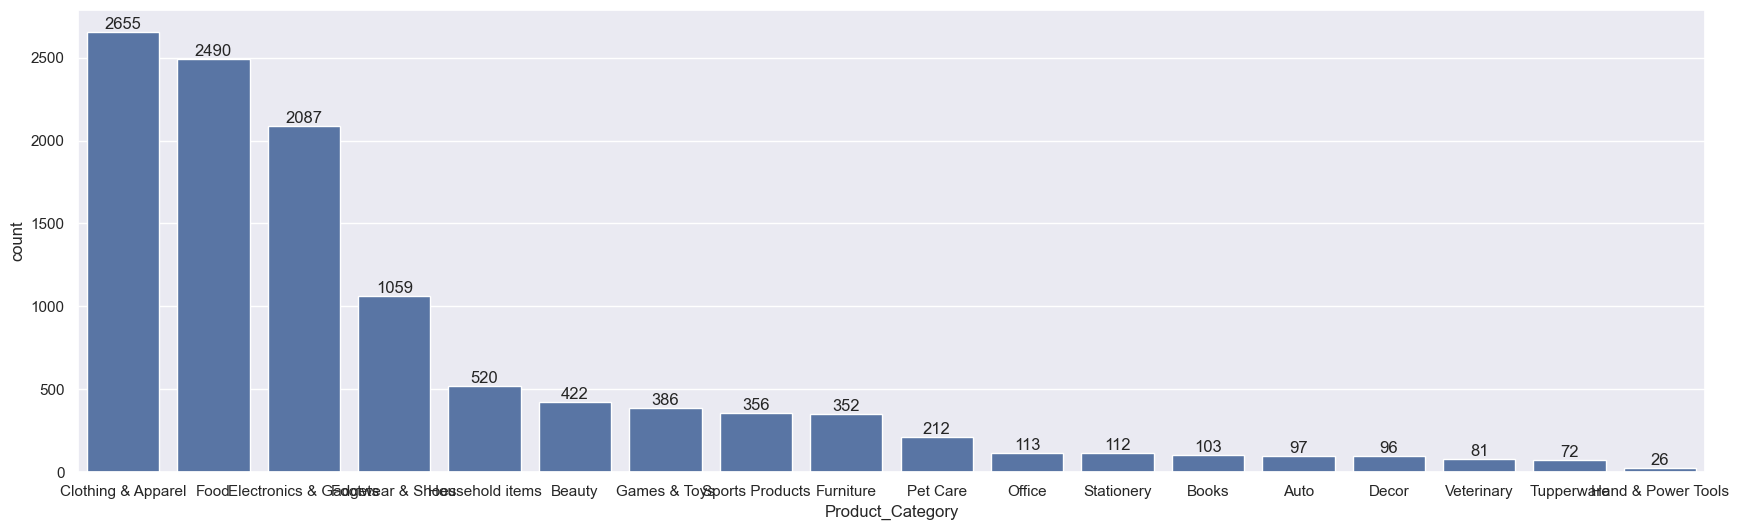

In [101]:
sns.set(rc={'figure.figsize': (21, 6)})
category_counts = df['Product_Category'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, x='Product_Category', order=category_counts.index)
for bars in ax.containers:
    ax.bar_label(bars)

#### From above graph we can see Most Order product by product Category.

<Axes: xlabel='Product_Category', ylabel='Amount'>

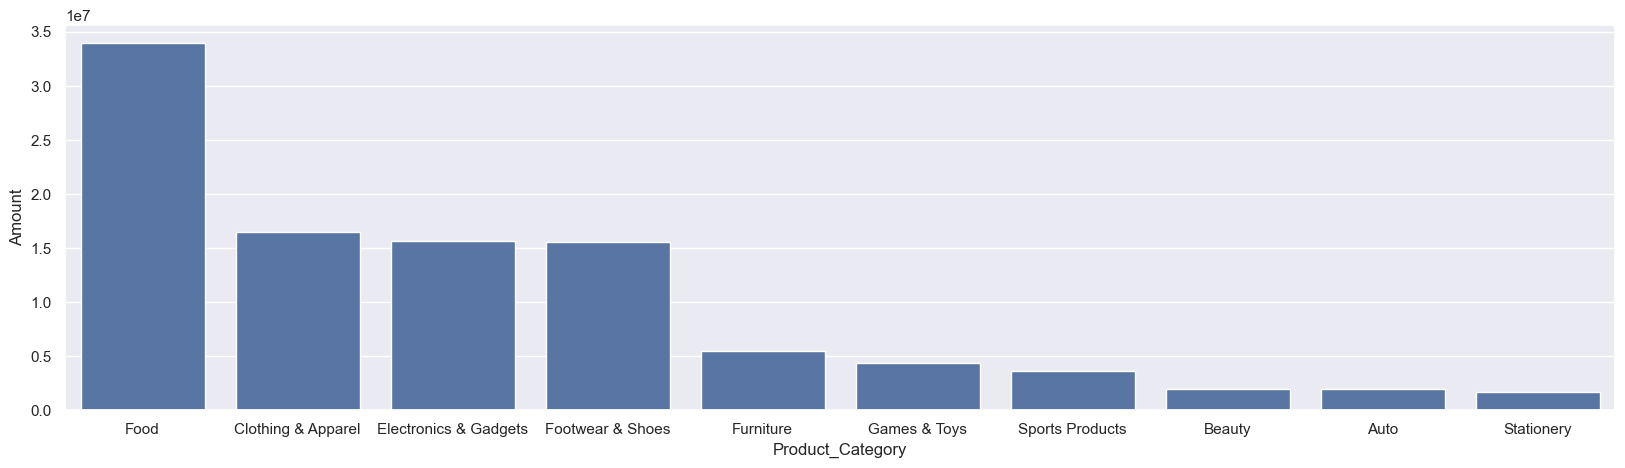

In [104]:
salespro= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by ='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=salespro ,x='Product_Category',y='Amount')    

#### From above graph we can see most of customers spend on Food,Clothings and electronics and gadgets

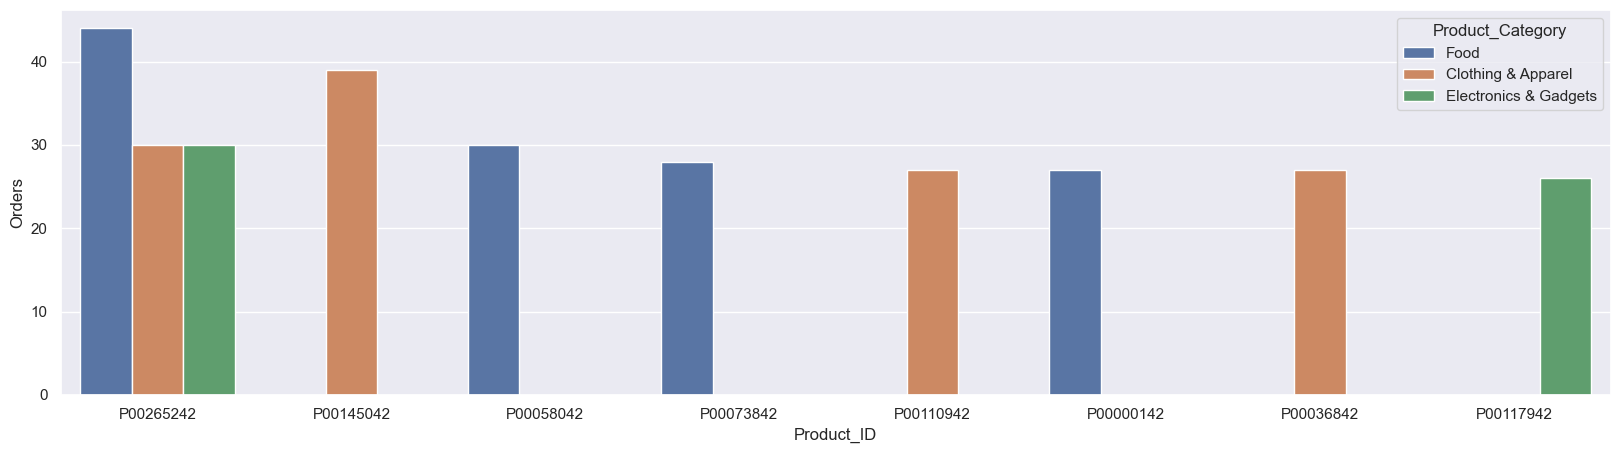

In [109]:
salespro = df.groupby(['Product_ID', 'Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', 
                                                                                                      ascending=False).head(10)
sns.set(rc={'figure.figsize': (20, 5)})
ax = sns.barplot(data=salespro, x='Product_ID', y='Orders', hue='Product_Category')

#### From above graph we can see No of Orders by Product id under product category.

<Axes: xlabel='Product_ID', ylabel='Orders'>

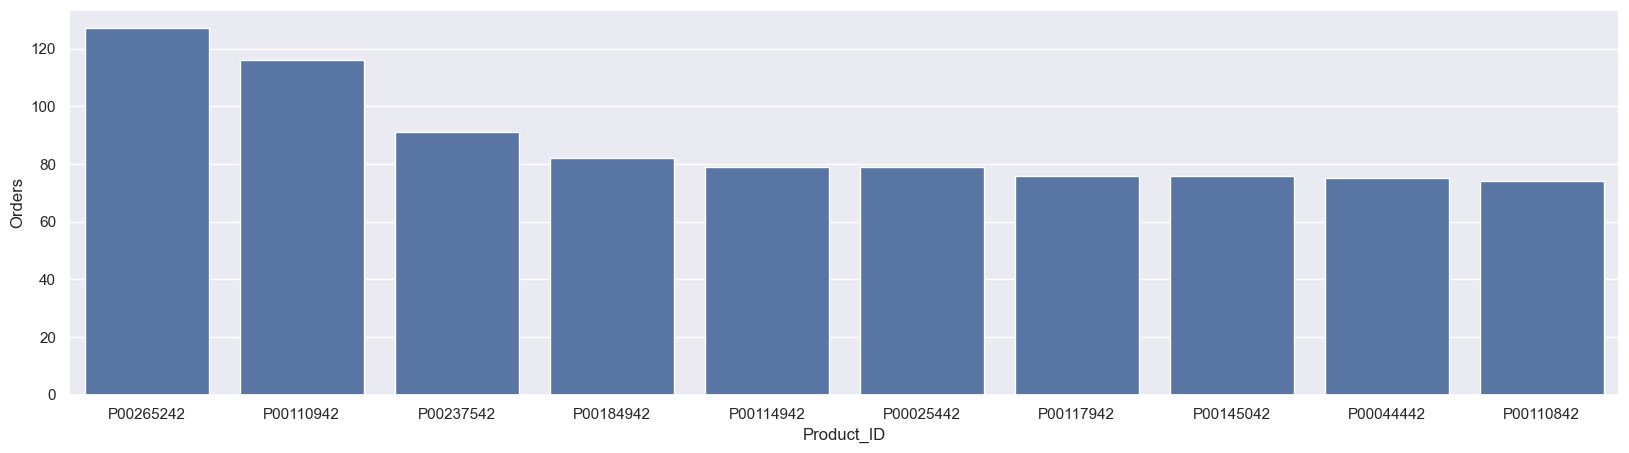

In [111]:
salespro = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=salespro, x='Product_ID', y='Orders')

   

#### From above graph we can see most selling product along with product_category

# Conclusion:-

##### Married women for age group 26-35 from U.P,Maharashatra & Karnataka working in IT Sector,Health care & Avaition are more likely to buy product from Food,Clothing & Electronic Category.
